In [1]:
import os
import math
import shutil
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from utils.draw import draw_single

In [2]:
def generate(count):
    X = np.random.randint(0, high=255, size=(count, 9))
    Y = X.dot(np.array([1, 1, 1, 0, 0, 0, -1, -1, -1]))
    Y[Y > 0] = 1
    Y[Y < 0] = -1
    return X, Y

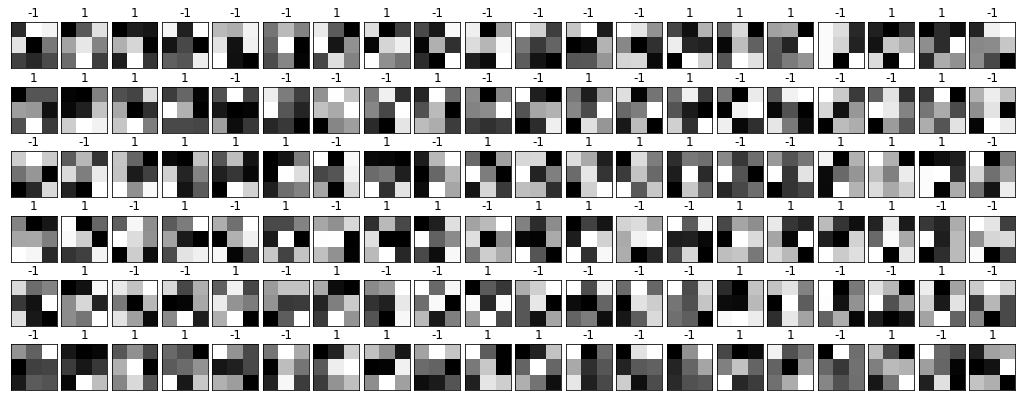

In [3]:
draw_single(*generate(120))

In [4]:
def train(n=512, epochs=31000, lr = 1e-3):
    # weight vector
    W = np.random.randn(9, 1)

    # training loop
    for t in range(epochs):
        # get new training data
        X, y = generate(n)
        X = X / 255
        y = y.reshape(n, 1)

        # model function
        h = X.dot(W)

        # compute loss
        loss = np.square(h - y).mean()

        # compute accuracy
        acc = (np.sign(h) == y).mean()

        if t % 5000 == 0:
            print('l: {:>8f}, a {:>.4f} (e {})'.format(loss, acc, t))

        # grad + update
        grad_w = 2 * X.T.dot(h - y) / n
        W -= lr * grad_w

    return W

In [5]:
W = train()
print('\nFinal W = \n\n{}'.format(W))

l: 2.826098, a 0.5215 (e 0)
l: 0.565322, a 0.8223 (e 5000)
l: 0.412433, a 0.9297 (e 10000)
l: 0.365760, a 0.9746 (e 15000)
l: 0.347903, a 0.9922 (e 20000)
l: 0.338252, a 1.0000 (e 25000)
l: 0.373862, a 1.0000 (e 30000)

Final W = 

[[ 1.13179384]
 [ 1.13089455]
 [ 1.13347194]
 [-0.00384232]
 [-0.0078364 ]
 [ 0.00724967]
 [-1.13251403]
 [-1.13009286]
 [-1.12999758]]
